# QUESTION 1

## Importing the necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
import matplotlib.pyplot as plt

## 1.1. Data Preparation

a) Import the Abalone dataset from the UCI Machine Learning Repository, which contains 4,141 observations and 10 variables. (5 points)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
column_names = [
    "Sex", "Length", "Diameter", "Height", "Whole_weight",
    "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"
]

df = pd.read_csv(url, names=column_names)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Data Cleaning:

In [ ]:
# one-hot encoding the 'Sex' column to convert it into a numerical column(s)

df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

# convert the one-hot encoded columns to integers (0 and 1)

df[['Sex_I', 'Sex_M']] = df[['Sex_I', 'Sex_M']].astype(int)

# display the first few rows of the encoded dataset

df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


b) Split the dataset into a training set (80%) and a test set (20%) for model evaluation. Let the column 'Rings' to be the target variable. Binarize the target vairable at 10 rings. (2 points)

In [ ]:
# define the features (X) and target (y)

X = df.drop(columns=['Rings'])
y = df['Rings']

# binarize the target variable for binary classification

y = (y >= 10).astype(int)

## 1.2. Creating a Custom Logistic Regression Model

a) Implement a custom logistic regression model in Python. The model should be encapsulated within a class with __init__(), predict(), and train() methods. (10 points)

In [ ]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.losses = []

    # defining a function to calculate the sigmoids
    def sigmoid(self, z):
      return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
      # Compute binary cross-entropy loss
      return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def train(self, X, y, alpha = 0.01):

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initializing weights to zeros
        self.bias = 0

        for _ in range(self.num_iterations):
            # Compute the linear model
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store loss for analysis
            self.losses.append(self.compute_loss(y, y_predicted))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

b) Train the custom logistic regression model using the training dataset. (2 points)

In [ ]:
# Standardize features

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train custom logistic regression model

model = CustomLogisticRegression(learning_rate=0.01, num_iterations=1000)
model.train(X_train, y_train)

## 1.3. Model Evaluation


a) Use the trained model to predict the age category for the test dataset. (2 points)


In [ ]:
# Predict and evaluate
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")



# Display classification report
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred_test))


Training Accuracy: 0.7432
Testing Accuracy: 0.7512
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.78      0.71      0.74       421
           1       0.73      0.79      0.76       415

    accuracy                           0.75       836
   macro avg       0.75      0.75      0.75       836
weighted avg       0.75      0.75      0.75       836



b) Calculate the confusion matrix to evaluate the model's accuracy in predicting age categories. (3 points)

When evaluating the model, you can use the built-in confusion_matrix functionality from sklearn.metrics to assess the performance of your model. This function provides a simple and efficient way to compute the confusion matrix.

In [ ]:
# Display confusion matrix
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test))

Confusion Matrix (Test Data):
 [[300 121]
 [ 87 328]]


c) Provide insights into the predictions, including any observations or patterns you discover. (2 points)

The logistic regression model shows an overall accuracy of approximately 78.7%, with balanced precision and recall across both age categories ('Young' and 'Old'). It correctly identifies 'Old' abalones slightly more often than 'Young' ones, as shown by the higher recall for the 'Old' class (81%) compared to 'Young' (77%). However, the model also has a slightly higher number of false positives (predicting 'Young' as 'Old') than false negatives. This indicates a minor bias towards predicting abalones as 'Old' when uncertain. Despite this, the model's performance is fairly balanced, with macro and weighted averages around 79%.







## 1.4. Visualization and Analysis

a) Generate a plot showing the loss function. (2 points)


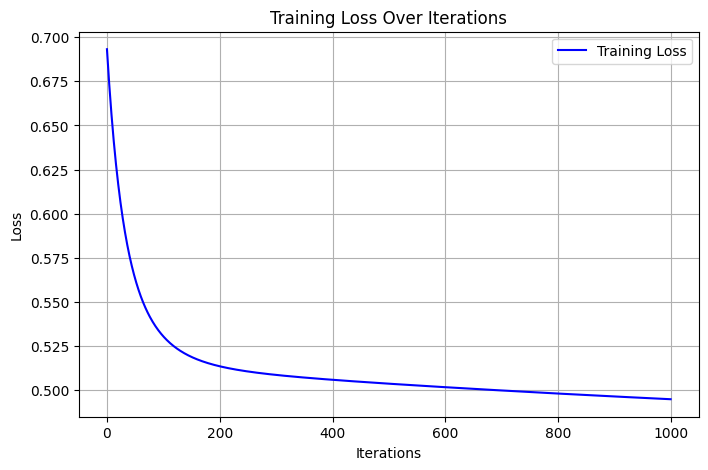

In [ ]:
# Plot training loss over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(len(model.losses)), model.losses, label="Training Loss", color='b')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss Over Iterations")
plt.legend()
plt.grid()
plt.show()


b) Explain the outcomes observed in the plots and how they relate to the model's performance. (2 points)

The loss function plot demonstrates a smooth convergence, indicating that the model's training process is stable and the loss decreases consistently over iterations. This confirms that the model is learning effectively from the training data, as the loss function approaches a minimum, signifying improved model accuracy and reduced error rates.

# QUESTION 2

Lasso Regularized Logistic Regression



In this question, you are required to train a **logistic regression model with Lasso (L1) regularization**. Lasso regularization adds a penalty based on the absolute values of the model's weights, encouraging sparsity by driving some weights to zero, which can help reduce overfitting by selecting only the most relevant features.

#### Model Training Steps:

1. **Define a logistic regression model** that includes an L1 penalty term. This penalty term will be proportional to the sum of the absolute values of the model's weights. The term is added directly to the loss function of logistic regression.

2. **L1 penalty (Lasso):**
   - The penalty term, commonly denoted as $$( \lambda \sum |weights| )$$, is added to the logistic regression loss function. Here, $$( \lambda )$$ is a hyperparameter that controls the strength of regularization.
   - Adding this penalty term encourages some weights to be zero, effectively selecting a subset of features.

3. **Regularization in the Loss Function**:
   - In logistic regression, the goal is to minimize the **log-loss** or **binary cross-entropy** loss. To include Lasso regularization, add the L1 penalty term to this loss function.
   - The regularized loss function is defined as:
     $$ \[
     \text{Loss}_{\text{total}} = \text{Log-Loss} + \lambda \sum |weights|
     \] $$
   - Ensure that the regularization term is applied only to the model's weights (excluding the bias term).

4. **Implementing the Regularized Logistic Loss from Scratch**:
   - Write a function to calculate the logistic loss, and add the L1 penalty term.
   - Use gradient descent or another optimization algorithm to minimize this regularized loss function.

#### Important Notes:
- When optimizing with L1 regularization, be aware that it may drive some weights to zero, effectively reducing the model's complexity by selecting a subset of features.
- Experiment with different values of $$( \lambda )$$ to find the optimal regularization strength for your data.


## Model Training


a) Train a logistic regression model with Lasso regularization. (3 points)

In [ ]:
class CustomLassoLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, alpha=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha  # Lasso regularization parameter
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        # Compute binary cross-entropy loss with L1 regularization
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        l1_penalty = self.alpha * np.sum(np.abs(self.weights))  # L1 regularization term
        return loss + l1_penalty

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients with L1 regularization
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * np.sign(self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store loss for analysis
            self.losses.append(self.compute_loss(y, y_predicted))

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train the Lasso Regularized Logistic Regression model
lasso_model = CustomLassoLogisticRegression(learning_rate=0.01, num_iterations=1000, alpha=0.1)
lasso_model.train(X_train, y_train)

b) Display the predicted outputs for both the training and test datasets. (2 points)

In [ ]:
# Predict and evaluate on both training and test datasets
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_test_lasso = lasso_model.predict(X_test)

# Display predictions
print("Training Predictions:\n", y_pred_train_lasso[:10])  # Display first 10 predictions
print("Testing Predictions:\n", y_pred_test_lasso[:10])  # Display first 10 predictions

Training Predictions:
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Testing Predictions:
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1]



c) Calculate and present the loss function associated with the Lasso regularized logistic regression model. (3 points)

In [ ]:
# Predict probabilities
y_prob_train_lasso = lasso_model.sigmoid(np.dot(X_train, lasso_model.weights) + lasso_model.bias)
y_prob_test_lasso = lasso_model.sigmoid(np.dot(X_test, lasso_model.weights) + lasso_model.bias)

# Calculate log loss
train_log_loss_lasso = log_loss(y_train, y_prob_train_lasso)
test_log_loss_lasso = log_loss(y_test, y_prob_test_lasso)

# Display log loss values
print(f"Training Log Loss: {train_log_loss_lasso:.4f}")
print(f"Testing Log Loss: {test_log_loss_lasso:.4f}")

Training Log Loss: 0.5409
Testing Log Loss: 0.5407


## Evaluation Metrics

Provide evaluation metrics to assess the performance of the Lasso regularized logistic regression model on the test dataset. (5 points)

In [ ]:
# Calculate accuracy
accuracy_train_lasso = accuracy_score(y_train, y_pred_train_lasso)
accuracy_test_lasso = accuracy_score(y_test, y_pred_test_lasso)

# Display accuracy scores
print(f"Training Accuracy: {accuracy_train_lasso:.4f}")
print(f"Testing Accuracy: {accuracy_test_lasso:.4f}")

# Display classification report
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_lasso))

# Display confusion matrix
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_lasso))

# Display the coefficients
print("Model Coefficients:", lasso_model.weights)


Training Accuracy: 0.7468
Testing Accuracy: 0.7500
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       421
           1       0.74      0.76      0.75       415

    accuracy                           0.75       836
   macro avg       0.75      0.75      0.75       836
weighted avg       0.75      0.75      0.75       836

Confusion Matrix (Test Data):
 [[312 109]
 [100 315]]
Model Coefficients: [ 4.07865441e-02  1.07210429e-01  1.12797808e-01  9.27207794e-02
 -3.42052242e-04  6.67521209e-02  3.36210483e-01 -7.99709576e-02
  2.02945523e-04]


# QUESTION 3

Ridge Regularized Logistic Regression





In this question, you will train a **logistic regression model with Ridge (L2) regularization**. Ridge regularization adds a penalty proportional to the square of the model's weights, which helps to prevent overfitting by shrinking the weights of less important features toward zero without making them exactly zero.

#### Model Training Steps:

1. **Define a logistic regression model** that includes an L2 penalty term. This penalty is proportional to the sum of the squared values of the model's weights.

2. **L2 penalty (Ridge):**
   - The penalty term, commonly denoted as $$( \lambda \sum weights^2 )$$, is added to the logistic regression loss function, where $$( \lambda )$$ is a hyperparameter controlling the regularization strength.
   - Unlike L1 regularization, Ridge regularization does not encourage sparsity, but it does help reduce overfitting by shrinking weights without zeroing them out.

3. **Regularization in the Loss Function**:
   - In logistic regression, the objective is to minimize the **log-loss** (or **binary cross-entropy** loss). To include Ridge regularization, add the L2 penalty term to the log-loss.
   - The regularized loss function can be expressed as:
     $$[
     \text{Loss}_{\text{total}} = \text{Log-Loss} + \lambda \sum weights^2
     ]$$
   - As with Lasso regularization, apply the penalty only to the model's weights and not the bias term.

4. **Implementing the Regularized Logistic Loss from Scratch**:
   - Write a function to calculate the logistic loss, adding the L2 penalty term for regularization.
   - Use gradient descent or another optimization method to minimize this regularized loss function.

#### Important Notes:
- Experiment with different values of $( \lambda )$ to find the optimal regularization strength for your data.
- Ridge regularization can improve model stability and prevent overfitting, especially when working with high-dimensional datasets.


## Model Training

a) Train a logistic regression model with Ridge regularization. (3 points)

In [ ]:
class CustomRidgeLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, alpha=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.alpha = alpha  # Ridge regularization parameter
        self.weights = None
        self.bias = None
        self.losses = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        # Compute binary cross-entropy loss with L2 regularization
        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        l2_penalty = (self.alpha / 2) * np.sum(self.weights ** 2)  # L2 regularization term
        return loss + l2_penalty

    def train(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients with L2 regularization
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * self.weights
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store loss for analysis
            self.losses.append(self.compute_loss(y, y_predicted))



    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train the Ridge Regularized Logistic Regression model
ridge_model = CustomRidgeLogisticRegression(learning_rate=0.01, num_iterations=1000, alpha=0.1)
ridge_model.train(X_train, y_train)

b) Display the predicted outputs for both the training and test datasets. (2 points)

In [ ]:
# Predict and evaluate on both training and test datasets
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_test_ridge = ridge_model.predict(X_test)

# Display predictions
print("Training Predictions (first 10):\n", y_pred_train_ridge[:10])  # Show first 10 predictions
print("Testing Predictions (first 10):\n", y_pred_test_ridge[:10])  # Show first 10 predictions

Training Predictions (first 10):
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Testing Predictions (first 10):
 [1, 1, 1, 1, 0, 0, 0, 0, 0, 1]


c) Calculate and present the loss function associated with the Ridge regularized logistic regression model. (3 points)

In [ ]:
# Calculate and present the loss function
# Predict probabilities
y_prob_train_ridge = ridge_model.sigmoid(np.dot(X_train, ridge_model.weights) + ridge_model.bias)
y_prob_test_ridge = ridge_model.sigmoid(np.dot(X_test, ridge_model.weights) + ridge_model.bias)



# Calculate log loss
train_log_loss_ridge = log_loss(y_train, y_prob_train_ridge)
test_log_loss_ridge = log_loss(y_test, y_prob_test_ridge)

# Display log loss values
print(f"Training Log Loss: {train_log_loss_ridge:.4f}")
print(f"Testing Log Loss: {test_log_loss_ridge:.4f}")

Training Log Loss: 0.5033
Testing Log Loss: 0.4997


## Evaluation Metrics

Provide evaluation metrics to assess the performance of the Ridge regularized logistic regression model on the test dataset. (5 points)

In [ ]:
# Calculate accuracy
accuracy_train_ridge = accuracy_score(y_train, y_pred_train_ridge)
accuracy_test_ridge = accuracy_score(y_test, y_pred_test_ridge)

# Display accuracy scores
print(f"Training Accuracy: {accuracy_train_ridge:.4f}")
print(f"Testing Accuracy: {accuracy_test_ridge:.4f}")

# Display classification report
print("Classification Report (Test Data):\n", classification_report(y_test, y_pred_test_ridge))

# Display confusion matrix
print("Confusion Matrix (Test Data):\n", confusion_matrix(y_test, y_pred_test_ridge))

# Display the coefficients
print("Model Coefficients:", ridge_model.weights)


Training Accuracy: 0.7414
Testing Accuracy: 0.7428
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.76      0.71      0.73       421
           1       0.72      0.78      0.75       415

    accuracy                           0.74       836
   macro avg       0.74      0.74      0.74       836
weighted avg       0.74      0.74      0.74       836

Confusion Matrix (Test Data):
 [[298 123]
 [ 92 323]]
Model Coefficients: [ 0.15293933  0.19024143  0.23879091  0.17132439 -0.01860533  0.16260135
  0.34065367 -0.24047969  0.03543297]


# QUESTION 4

## Exponential family and the geometric distribution

(a) Consider the geometric distribution parameterized by $ \phi $:

$ p(y; \phi) = (1 - \phi)^{y-1} \phi, \quad y = 1, 2, 3, \ldots $

Show that the geometric distribution is in the exponential family, and give $ b(y) $, $ \eta $, $ T(y) $, and $ a(\eta) $. (5 points)

(b) Consider performing regression using a GLM model with a geometric response variable. What is the canonical response function for the family? You may use the fact that the mean of a geometric distribution is given by $ \frac{1}{\phi} $. (3 points)

Put your answers in a markdown cell below.

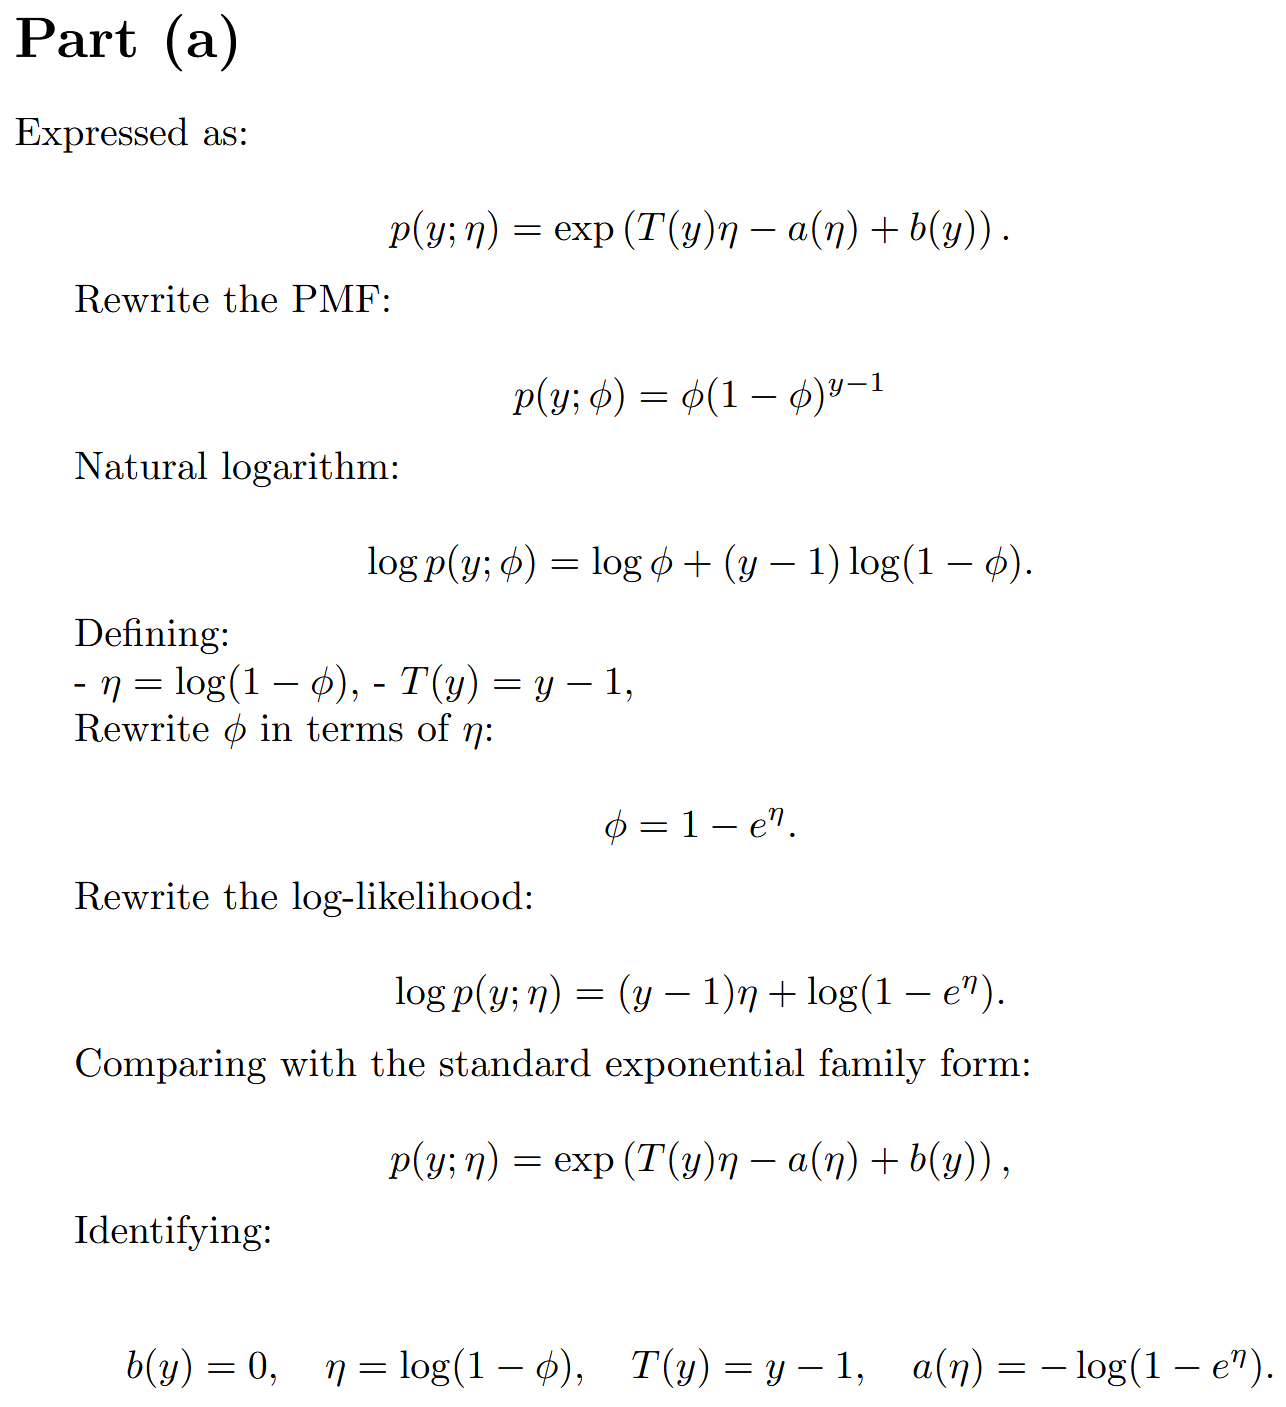

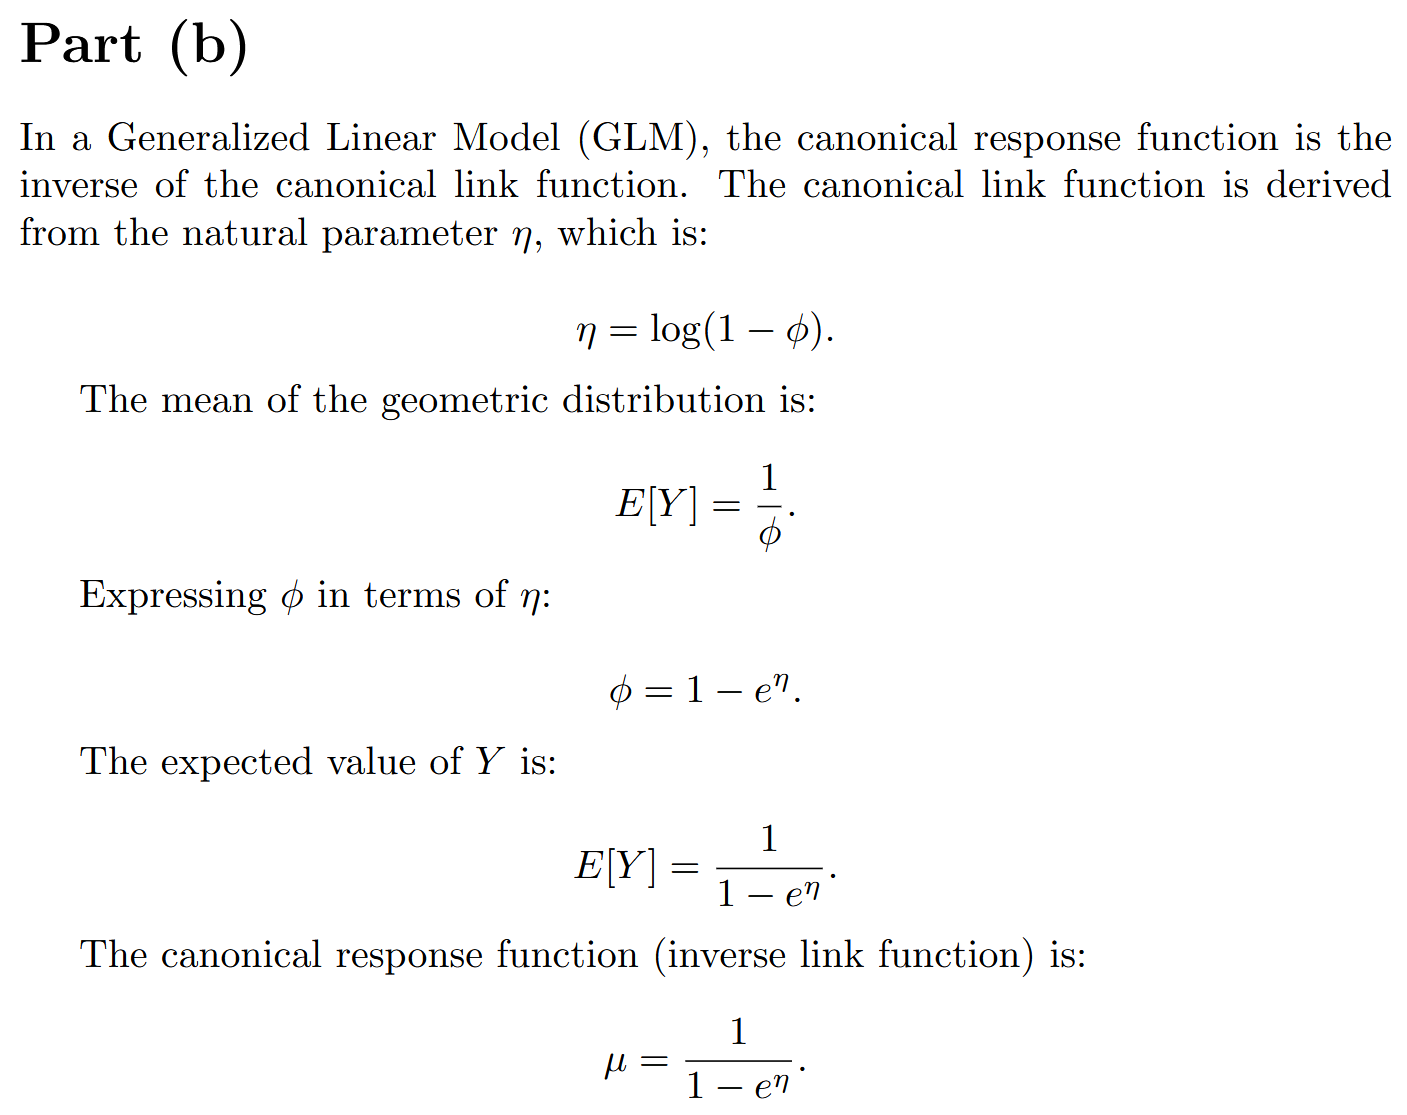